# DV Laboratory Part B - Exercise 5

### Cluster the Iris dfset using the k-means method. Visualize the df, use the elbow method to get the most optimum number of clusters and finally plot the centroids along with the df.

In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [67]:
df = pd.read_csv("iris_dataset.csv")
df = df.drop(columns=['target', 'sepal_width', 'petal_width'])
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df = pd.DataFrame(scaled, columns=df.columns)
df.head()

,sepal_length,petal_length
0,-0.900681,-1.341272
1,-1.143017,-1.341272
2,-1.385353,-1.398138
3,-1.506521,-1.284407
4,-1.021849,-1.341272


In [68]:
SSEs = []

for k in range(1, 11):
    kmeans: KMeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    SSEs.append(kmeans.inertia_)

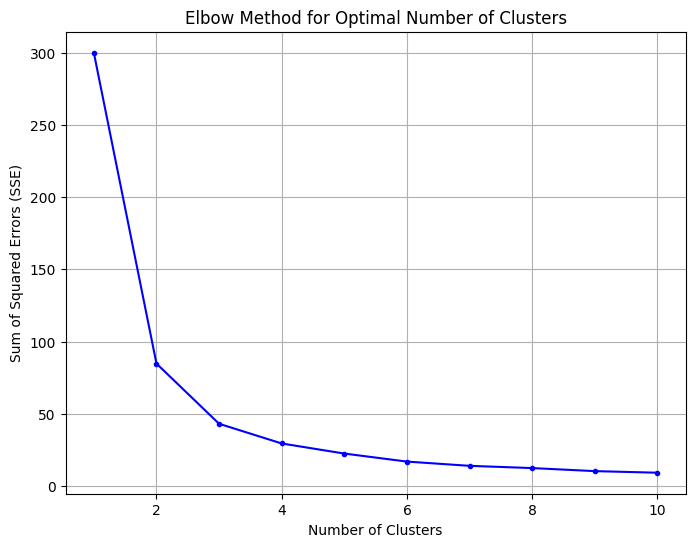

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), SSEs, color="blue", marker=".")
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

In [70]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=42)
clusters = kmeans.fit_predict(df)

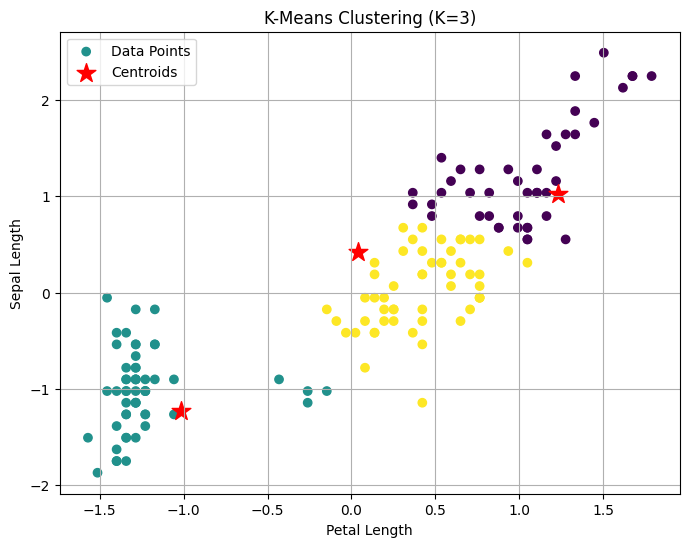

In [72]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(df['petal_length'], df['sepal_length'], c=clusters, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', s=200, marker='*', label='Centroids')
plt.title(f'K-Means Clustering (K={K})')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend()
plt.grid(True)
plt.show()